In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [1]:
from google.colab import files
uploaded = files.upload()

Saving sales_Dataset.csv to sales_Dataset.csv


In [5]:
df = pd.read_csv("sales_Dataset.csv")
df.head()

/tmp/ipython-input-376221889.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("sales_Dataset.csv")


,order_id,order_date,status,item_id,sku,qty_ordered,price,value,discount_amount,total,...,SSN,Phone No.,Place Name,County,City,State,Zip,Region,User Name,Discount_Percent
0,100354678,2020-10-01,received,574772.0,oasis_Oasis-064-36,21.0,89.9,1798.0,0.0,1798.0,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
1,100354678,2020-10-01,received,574774.0,Fantastic_FT-48,11.0,19.0,190.0,0.0,190.0,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
2,100354680,2020-10-01,complete,574777.0,mdeal_DMC-610-8,9.0,149.9,1199.2,0.0,1199.2,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
3,100354680,2020-10-01,complete,574779.0,oasis_Oasis-061-36,9.0,79.9,639.2,0.0,639.2,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
4,100367357,2020-11-13,received,595185.0,MEFNAR59C38B6CA08CD,2.0,99.9,99.9,0.0,99.9,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286392 entries, 0 to 286391
Data columns (total 36 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   order_id          286392 non-null  object 
 1   order_date        286392 non-null  object 
 2   status            286392 non-null  object 
 3   item_id           286392 non-null  float64
 4   sku               286392 non-null  object 
 5   qty_ordered       286392 non-null  float64
 6   price             286392 non-null  float64
 7   value             286392 non-null  float64
 8   discount_amount   286392 non-null  float64
 9   total             286392 non-null  float64
 10  category          286392 non-null  object 
 11  payment_method    286392 non-null  object 
 12  bi_st             286392 non-null  object 
 13  cust_id           286392 non-null  float64
 14  year              286392 non-null  int64  
 15  month             286392 non-null  object 
 16  ref_num           28

In [11]:
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
df.dropna(subset=['order_date'], inplace=True)
df['order_date'].head()

,order_date
0,2020-10-01
1,2020-10-01
2,2020-10-01
3,2020-10-01
4,2020-11-13


In [12]:
critical_cols = ['order_date', 'qty_ordered', 'price', 'total', 'City', 'State']
print(df[critical_cols].isnull().sum())

order_date     0
qty_ordered    0
price          0
total          0
City           0
State          0
dtype: int64


In [13]:
df.rename(columns={'total': 'Revenue'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286392 entries, 0 to 286391
Data columns (total 36 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   order_id          286392 non-null  object        
 1   order_date        286392 non-null  datetime64[ns]
 2   status            286392 non-null  object        
 3   item_id           286392 non-null  float64       
 4   sku               286392 non-null  object        
 5   qty_ordered       286392 non-null  float64       
 6   price             286392 non-null  float64       
 7   value             286392 non-null  float64       
 8   discount_amount   286392 non-null  float64       
 9   Revenue           286392 non-null  float64       
 10  category          286392 non-null  object        
 11  payment_method    286392 non-null  object        
 12  bi_st             286392 non-null  object        
 13  cust_id           286392 non-null  float64       
 14  year

In [16]:
print(df[['order_date', 'qty_ordered', 'price', 'Revenue', 'City', 'State']].head())
print(df.info())

  order_date  qty_ordered  price  Revenue    City State
0 2020-10-01         21.0   89.9   1798.0  Vinson    OK
1 2020-10-01         11.0   19.0    190.0  Vinson    OK
2 2020-10-01          9.0  149.9   1199.2  Vinson    OK
3 2020-10-01          9.0   79.9    639.2  Vinson    OK
4 2020-11-13          2.0   99.9     99.9  Vinson    OK
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286392 entries, 0 to 286391
Data columns (total 36 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   order_id          286392 non-null  object        
 1   order_date        286392 non-null  datetime64[ns]
 2   status            286392 non-null  object        
 3   item_id           286392 non-null  float64       
 4   sku               286392 non-null  object        
 5   qty_ordered       286392 non-null  float64       
 6   price             286392 non-null  float64       
 7   value             286392 non-null  float64       
 8 

In [17]:
essential_columns = [
    'order_id',
    'order_date',
    'Revenue',
    'qty_ordered',
    'City',
    'State',
    'Region',
    'category'
]

df_ml = df[essential_columns].copy()
df_ml.head()

,order_id,order_date,Revenue,qty_ordered,City,State,Region,category
0,100354678,2020-10-01,1798.0,21.0,Vinson,OK,South,Men's Fashion
1,100354678,2020-10-01,190.0,11.0,Vinson,OK,South,Men's Fashion
2,100354680,2020-10-01,1199.2,9.0,Vinson,OK,South,Men's Fashion
3,100354680,2020-10-01,639.2,9.0,Vinson,OK,South,Men's Fashion
4,100367357,2020-11-13,99.9,2.0,Vinson,OK,South,Men's Fashion


In [18]:
print("DataFrame Info after cleaning steps:")
df.info()

DataFrame Info after cleaning steps:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286392 entries, 0 to 286391
Data columns (total 36 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   order_id          286392 non-null  object        
 1   order_date        286392 non-null  datetime64[ns]
 2   status            286392 non-null  object        
 3   item_id           286392 non-null  float64       
 4   sku               286392 non-null  object        
 5   qty_ordered       286392 non-null  float64       
 6   price             286392 non-null  float64       
 7   value             286392 non-null  float64       
 8   discount_amount   286392 non-null  float64       
 9   Revenue           286392 non-null  float64       
 10  category          286392 non-null  object        
 11  payment_method    286392 non-null  object        
 12  bi_st             286392 non-null  object        
 13  cust_id           2863

In [19]:
print("\nNull values per column after cleaning steps:")
print(df.isnull().sum())


Null values per column after cleaning steps:
order_id            0
order_date          0
status              0
item_id             0
sku                 0
qty_ordered         0
price               0
value               0
discount_amount     0
Revenue             0
category            0
payment_method      0
bi_st               0
cust_id             0
year                0
month               0
ref_num             0
Name Prefix         0
First Name          0
Middle Initial      0
Last Name           0
Gender              0
age                 0
full_name           0
E Mail              0
Customer Since      0
SSN                 0
Phone No.           0
Place Name          0
County              0
City                0
State               0
Zip                 0
Region              0
User Name           0
Discount_Percent    0
dtype: int64


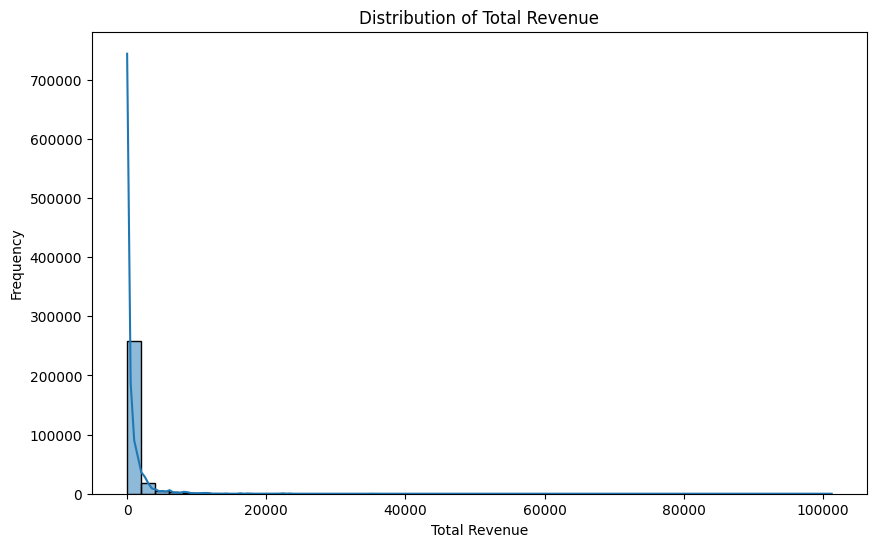

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(df_ml['Revenue'], bins=50, kde=True)
plt.title('Distribution of Total Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Frequency')
plt.show()

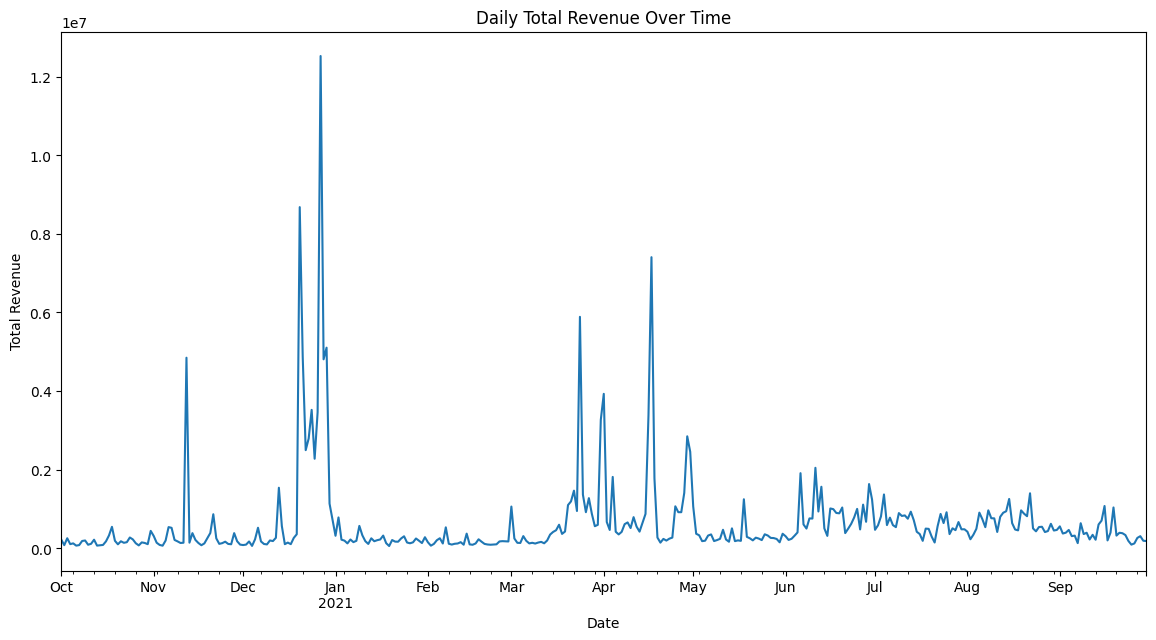

In [22]:
daily_sales = df_ml.set_index('order_date')['Revenue'].resample('D').sum().fillna(0)

plt.figure(figsize=(14, 7))
daily_sales.plot()
plt.title('Daily Total Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.show()

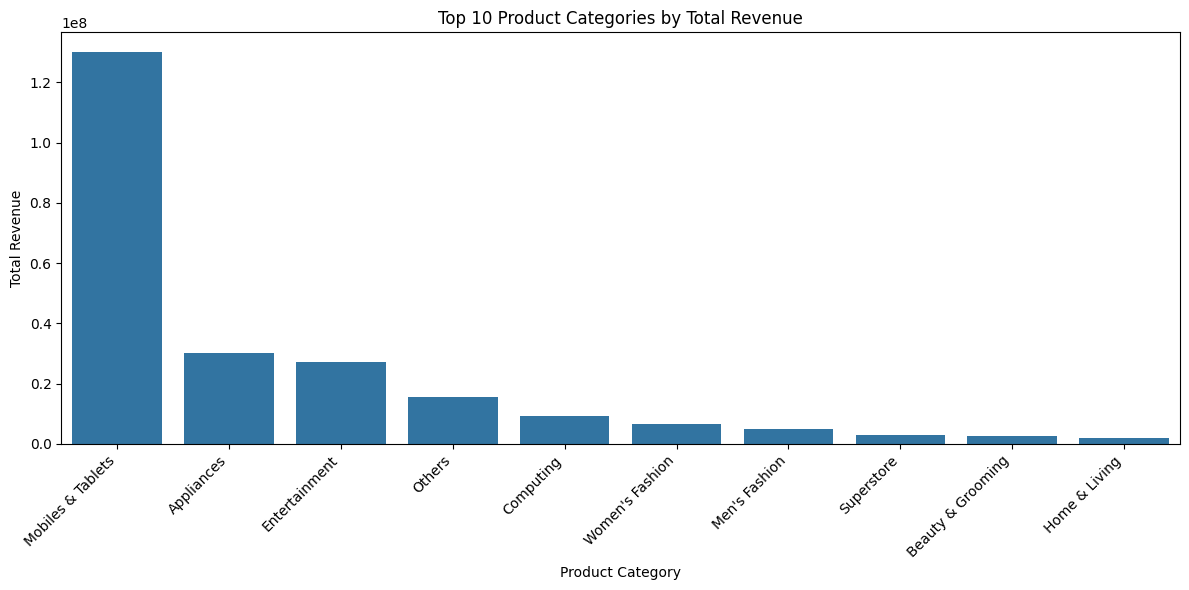

In [23]:
category_revenue = df_ml.groupby('category')['Revenue'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=category_revenue.index, y=category_revenue.values)
plt.title('Top 10 Product Categories by Total Revenue')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [24]:
state_revenue = df_ml.groupby('State')['Revenue'].sum().sort_values(ascending=False).head(10)
print(state_revenue)

State
TX    1.546746e+07
CA    1.387618e+07
NY    1.136510e+07
PA    1.015904e+07
IL    9.106895e+06
FL    8.459037e+06
VA    8.193937e+06
OH    8.147443e+06
MO    8.000870e+06
KY    6.994809e+06
Name: Revenue, dtype: float64


In [26]:
correlation = df_ml[['Revenue', 'qty_ordered']].corr()
print(correlation)

              Revenue  qty_ordered
Revenue      1.000000     0.002603
qty_ordered  0.002603     1.000000


In [32]:
# Aggregate data by location (State and City)
location_sales = df_ml.groupby(['State', 'City']).agg(
    Total_Revenue=('Revenue', 'sum'),
    Total_Orders=('order_id', 'nunique'),
    Avg_Order_Value=('Revenue', 'mean')
).reset_index()

# Calculate Revenue per Order
location_sales['Revenue_Per_Order'] = location_sales['Total_Revenue'] / location_sales['Total_Orders']
print(location_sales.head())

  State       City  Total_Revenue  Total_Orders  Avg_Order_Value  \
0    AK       Adak       1009.000             5       201.800000   
1    AK   Akiachak        800.000             1       800.000000   
2    AK      Akiak       9266.020            10       926.602000   
3    AK  Aleknagik        574.800             3       191.600000   
4    AK  Allakaket      11666.636             7      1296.292889   

   Revenue_Per_Order  
0         201.800000  
1         800.000000  
2         926.602000  
3         191.600000  
4        1666.662286  


In [33]:
# Select features for clustering and apply log transformation
X = location_sales[['Total_Revenue', 'Total_Orders', 'Avg_Order_Value', 'Revenue_Per_Order']].copy()
X['Total_Revenue'] = np.log1p(X['Total_Revenue'])
X['Total_Orders'] = np.log1p(X['Total_Orders'])

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-Means Clustering (3 clusters: Low, Medium, High)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
location_sales['Cluster'] = kmeans.fit_predict(X_scaled)

# Identify the High-Value Cluster
cluster_summary = location_sales.groupby('Cluster')['Total_Revenue'].mean().sort_values(ascending=False)
high_value_cluster = cluster_summary.index[0]

# Create the binary target variable: 1 for High-Value, 0 for Other
location_sales['High_Value_City'] = (location_sales['Cluster'] == high_value_cluster).astype(int)

print(location_sales['High_Value_City'].value_counts())

High_Value_City
0    23525
1      713
Name: count, dtype: int64


In [40]:
X = location_sales[['Total_Revenue', 'Total_Orders', 'Avg_Order_Value', 'Revenue_Per_Order']]
y = location_sales['High_Value_City']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Define the models
models = {
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Support Vector Machine': SVC(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
}

results = []

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append({
        'Model': name,
        'Accuracy': f'{accuracy:.4f}',
        'F1-Score': f'{f1:.4f}'
    })

# After the loop, create the comparison_df and print the best model
comparison_df = pd.DataFrame(results)
print(comparison_df)
best_model_row = comparison_df.sort_values(by='F1-Score', ascending=False).iloc[0]
print(f"\nBest Model: {best_model_row['Model']} with F1-Score of {best_model_row['F1-Score']}")

                    Model Accuracy F1-Score
0     K-Nearest Neighbors   0.9957   0.9235
1           Decision Tree   0.9988   0.9790
2             Naive Bayes   0.9726   0.6826
3           Random Forest   0.9992   0.9860
4     Logistic Regression   0.9992   0.9861
5  Support Vector Machine   0.9917   0.8370
6                 XGBoost   0.9990   0.9837

Best Model: Logistic Regression with F1-Score of 0.9861


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [18:16:54] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [41]:
# Install Prophet
!pip install prophet

In [42]:
from prophet import Prophet

# Prepare data for Prophet
prophet_df = daily_sales.reset_index()
prophet_df.columns = ['ds', 'y']

# Initialize and fit the Prophet model
model = Prophet(
    seasonality_mode='multiplicative',
    weekly_seasonality=True,
    daily_seasonality=False,
    yearly_seasonality=True
)
model.fit(prophet_df)

In [43]:
# Create a future DataFrame for the next year
future = model.make_future_dataframe(periods=365)

# Make predictions
forecast = model.predict(future)

# Display the forecast for the next year
print("Forecast for the next year:")
display(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

Forecast for the next year:


,ds,yhat,yhat_lower,yhat_upper
725,2022-09-26,-12114.315785,-1.159129e+06,1.209806e+06
726,2022-09-27,-10771.529240,-1.111716e+06,1.132917e+06
727,2022-09-28,-15255.634025,-1.203217e+06,1.155739e+06
728,2022-09-29,-19430.371988,-1.292928e+06,1.241413e+06
729,2022-09-30,-15442.541190,-1.303487e+06,1.202726e+06


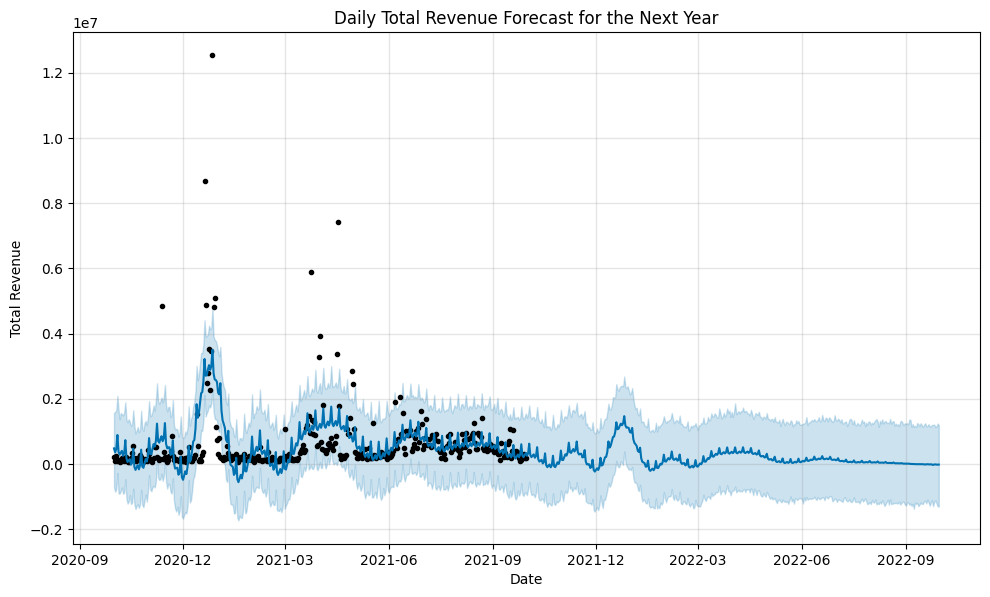

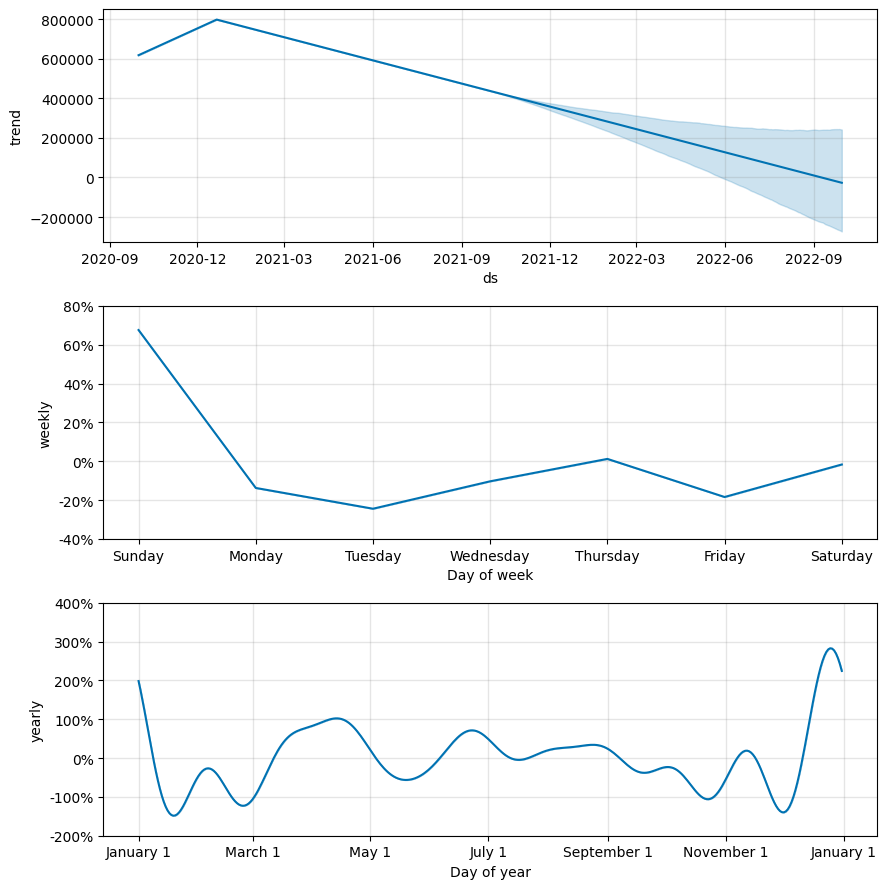

In [44]:
import matplotlib.pyplot as plt

# Plot the forecast
fig = model.plot(forecast)
plt.title('Daily Total Revenue Forecast for the Next Year')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.show()

# Plot the components of the forecast (trend, weekly, yearly seasonality)
fig2 = model.plot_components(forecast)
plt.show()